<a href="https://colab.research.google.com/github/itsnotyousef/NeuralSearchEngine/blob/Keras-Embedding/NeuralSearchEngineDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install sentence-transformers


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
# from sentence_transformers import SentenceTransformer
# from sklearn.metrics.pairwise import cosine_similarity

In [4]:
!pip install openpyxl

In [5]:
df = pd.read_excel("/content/drive/MyDrive/GP/dataset/Prepared_Dataset.xlsx")

In [6]:
pd.set_option('display.max_colwidth', None)  # Show full content in each column
pd.set_option('display.width', 1000)  # Increase table width


df.head(2)

Column1            ISBN          Title                    Author  Authors_Number  \
0        0      9774416333  ุงุณุชูุชุน ุจุญูุงุชู   ูุญูุฏ ุนุจุฏ ุงูุฑุญูู ุงูุนุฑููู             1.0   
1        1   9789777195522     ุนุจูุฑูุฉ ุนูุฑ         ุนุจุงุณ ูุญููุฏ ุงูุนูุงุฏ             1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Description  \
0  ููุง ููุช ูู ุงูุณุงุฏุณุฉ ุนุดุฑุฉ ูู ุนูุฑู ููุน ูู ูุฏู ูุชุงุจ "ูู ุงูุชุนุงูู ูุน ุงููุงุณ" ููุคููู "ุฏุงูู ูุงุฑููุฌู" ูุงู ูุชุงุจุง ุฑุงุฆุนุง ูุฑุฃุชู ุนุฏุฉ ูุฑุงุช.. ูุงู ูุงุชุจู ุงูุชุฑุญ ุฃู ูุนูุฏ ุงูุดุฎุต ูุฑุงุกุชู ูู ุดูุฑ.. ููุนูุช ุฐูู.. ุฌุนูุช ุฃุทุจู ููุงุนุฏู ุนูุฏ ุชุนุงููู ูุน ุงููุงุณ ูุฑุฃูุช ูุฐูู ูุชุงุฆุฌ ุนุฌูุจุฉ.. ูุงู ูุงุฑููุฌู ูุณูู ุงููุงุนุฏุฉ \t\t\tุฏูุชูุฑ ูู ุงูุนููุฏุฉ ูุฃุณุชุงุฐ ูุณุงุนุฏ ูู ูููุฉ ุงููุนูููู ุจุฌุงูุนุฉ ุงูููู ุณุนูุฏ ููู ุฃูุถุง ุฏุงุนูุฉ ุฅุณูุงูู ุณุนูุฏู ูุนุฑูู . ูุดุฃ ูู ูุฏููุฉ ุงูุฏูุงู ููุง ุฏุฑุณ ุจูุง ุงููุฑุงุญู ุงูุฏุฑุงุณูุฉ ุงูุฃูููุ ููุฏ ูุงู ูููู ุฏุฑุงุณุฉ ุงูุทุจ ูุญุธุฉ ุชุฎุฑุฌูุ ุซู ุชุฑุงุฌุน ูุงูุชุญู ุจูููุฉ ุงูุดุฑูุนุฉุ ูุจุนุฏ ุฐูู ุชูุฏู ููุฏุฑุงุณุงุช ุงูุนููุง ูู ุฌุงูุนุฉ ุงูุฅูุงู ูุญูุฏ ุจู ููุฐูุฑ ุชุญุชูุง ุฃูุซูุฉ ูููุงุฆุน ูุฑุฌุงู ุชููุฒูุง ูู ูููู.. ุฑูุฒููุช.. ูููููู.. ุฌูุฒู.. ูุงูู.. ูุชุฃููุช ููุฌุฏุช ุฃู ุงูุฑุฌู ูุคูู ูููุฌู ู

#EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16558 entries, 0 to 16557
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Column1           16558 non-null  int64  
 1   ISBN              8562 non-null   object 
 2   Title             16558 non-null  object 
 3   Author            16550 non-null  object 
 4   Authors_Number    16551 non-null  float64
 5   Description       16558 non-null  object 
 6   Genres            15178 non-null  object 
 7   Average_Ratings   16557 non-null  float64
 8   Reviews_Number    7627 non-null   float64
 9   Quotes_Number     4555 non-null   float64
 10  Community_Size    15777 non-null  float64
 11  Pages_Number      16558 non-null  int64  
 12  Editions          16558 non-null  int64  
 13  Publication_Year  14154 non-null  float64
 14  Publisher         1461 non-null   object 
 15  URL               16558 non-null  object 
 16  Cover_URL         16554 non-null  object

In [8]:
# need to figure what is the most author in our dataset
df['Author'].value_counts()


Author
ูุงุฏูุง ุฏูุงุจ             142
ูุงูู ูููุงูู            119
ุนุจุงุณ ูุญููุฏ ุงูุนูุงุฏ       81
ูุตุทูู ูุญููุฏ             75
ุฃุฌุงุซุง ูุฑูุณุชู            70
                      ... 
ูุญูุฏ ุงูุฒุญููู             1
ูุญูุฏ ุฅุจุฑุงููู ุจุณูููู      1
ุนูุณู ุฏุจุงุญ                1
ูุญููุฏ ุดุฑูู ุจุณูููู        1
ูุจูู ุงูุนุฑุจู              1
Name: count, Length: 8662, dtype: int64

In [9]:
df['Description'].value_counts()
df['Description'].nunique()


13522

In [10]:
# need to get empty entry in description column
df['Description'] = df['Description'].astype(str).str.strip().replace({'': pd.NA})

In [11]:
df['Description'].isnull().sum()

np.int64(2358)

In [12]:
s = df['Description'].iloc[2833]

In [13]:
print(s)

<NA>


In [14]:
print(type(s))

<class 'pandas._libs.missing.NAType'>


In [15]:
df.dropna(subset=['Description'], inplace=True)

In [16]:
df['Description'].isnull().sum()

np.int64(0)

#preprocess

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
def remove_punctuation(text):
    arabic_punctuation = r"[ุุุ!ูชูยซยปโฆ\"\'ูซูฌูญ\,.:ุุ!<>*โโฆโ()\[\{}/\\_#$%&+;=?@^~`\]\|โ\u2014\u2013\u002D]"
    return re.sub(arabic_punctuation,' ', text)

def remove_repeated_whitespaces(text):
    return re.sub(r'(?<=\S)\s{2,}(?=\S)', ' ', text)

def remove_arabic_numbers(text):
    return re.sub(r'[\u0660-\u0669]', " ", text)

def remove_diacritics(text):
    arabic_diacritics = re.compile(r'[\u064B-\u065F]')
    return re.sub(arabic_diacritics, ' ', text)

def remove_all_except_arabic(text):
    return re.sub(r'[^\u0600-\u06FF\s]', ' ', text)

def remove_links(text):
  return re.sub(r'http[s]?://\S+|www\.\S+',' ',text)

def remove_stop_words(text):
    stop_words = set(stopwords.words('arabic'))  # Corrected function call
    words = text.split()  # Tokenize the text by spaces
    filtered_text = " ".join([word for word in words if word not in stop_words])
    return filtered_text

def normalize_arabic(text):
    # Define normalization mapping
    normalization_map = {
        "ุฅ": "ุง",
        "ุฃ": "ุง",
        "ุข": "ุง",
        "ุง": "ุง",  # Normalize Alef forms
        "ู": "ู",
        "ู": "ู",                      # Normalize Yaa
        "ุค": "ู",
        "ุฆ": "ู",                      # Normalize Hamza forms
        "ุฉ": "ู",                                # Convert Teh Marbuta to Heh
        "ฺฏ": "ู",
        "ฺค": "ู",
        "ฺ": "ุฌ",
        "ูพ": "ุจ",  # Persian/Urdu to Arabic conversion
                       # Convert Arabic numbers to Western numbers
    }

    # Apply replacements using regex
    text = re.sub("|".join(map(re.escape, normalization_map.keys())),
                  lambda m: normalization_map[m.group()], text)

    return text



In [20]:
def preprocess(series):
  series = series.apply(remove_diacritics)
  series = series.apply(remove_links)
  series = series.apply(remove_punctuation)
  series = series.apply(remove_repeated_whitespaces)
  series = series.apply(remove_arabic_numbers)
  series = series.apply(remove_all_except_arabic)
  series = series.apply(remove_stop_words)
  series = series.apply(normalize_arabic)
  return series

In [21]:
df['Description'] = preprocess(df['Description'])

In [22]:
df['Description'].iloc[10095]

'ูุชุงุจ ุงูุดููุฏ ุงูุฎุงูุฏ ุงูุญุณูู ุจู ุนูู ุงูุณูุงู ุตุฏุฑุช ุทุจุนู ุงูุฑุงู ุนุงู ุงุนูุฏุช ุทุจุงุนุชู ูุฑ ุฑู ูุงุนุชุจุฑ ุงูู ุงููุชุจ ุชูุงููุช ุญุฑูู ุงูุงูุงู ุงูุญุณูู ุจู ุนูู ุงูุณูุงู ููุงูุนู ูุฑุจูุงุก ุจุตูุฑู ุนููู ูุชุญููู ุงุณุชุฏูุงูู ูุงูุด ููู ูู ุงูู ุงููู ุงูุดูุฎ ูุนูู ุงููู ุตุงูุญู ูุฌู ุงุจุงุฏู ุนููุงุก ุงูุดูุนู ุงูุงูุงููู ุงููุฌุชูุฏูู ุงูุฑุงู ูุงููุฏุฑ ุงูุจุงุฑุฒูู ุงูุญูุฒู ุงูุฏูููู ูู ุงุณุจุงุจ ุงูุญุฑูู ุงูุญุณููู ูุฏูุงูุนูุง ููุงูู ุชูุง ููุฑุงุญููุง ูุงูุฏุงููุง ููุชุงูุฌูุง ูุงุซุงุฑูุง ููุฏ ูุฑุงุกู ุฌุฏูุฏู ุชุชุนุงุฑุถ ููู ุงููุฑุงุกู ุชูุฏ ููุง ุงูุฑูุงูู ุงูุดูุนูู ุงููุบุงููู ูุงูุนุงุทููู ุงูุฑุงูุฌู ูุฑูู ุงุนุชุจุฑ ุงุบูุจ ุงูุจุงุญุซูู ุงูุงูุฑุงูููู ูุชุงุจ ุงูุดููุฏ ุงูุฎุงูุฏ ุงูู ุงููุชุจ ูุงูุดุช ูุถูู ุงูุญุณ

In [23]:
df = df.drop(columns = ['Column1','ISBN', 'Reviews_Number', 'Quotes_Number',
       'Community_Size', 'Pages_Number', 'Editions', 'Publication_Year',
       'Publisher', 'URL', 'Cover_URL',"Authors_Number"])

In [24]:
df.head(1)

Title                    Author  \
0  ุงุณุชูุชุน ุจุญูุงุชู   ูุญูุฏ ุนุจุฏ ุงูุฑุญูู ุงูุนุฑููู   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Description  \
0  ููุช ูู ุงูุณุงุฏุณู ุนูุฑู ููุน ูู ูุฏู ูุชุงุจ ูู ุงูุชุนุงูู ุงููุงุณ ูููููู ุฏุงูู ูุงุฑููุฌู ูุชุงุจุง ุฑุงูุนุง ูุฑุงุชู ุนุฏู ูุฑุงุช ูุงุชุจู ุงูุชุฑุญ ูุนูุฏ ุงูุดุฎุต ูุฑุงุกุชู ุดูุฑ ููุนูุช ุฌุนูุช ุงุทุจู ููุงุนุฏู ุชุนุงููู ุงููุงุณ ูุฑุงูุช ูุฐูู ูุชุงูุฌ ุนุฌูุจู ูุงุฑููุฌู ูุณูู ุงููุงุนุฏู ุฏูุชูุฑ ุงูุนููุฏู ูุงุณุชุงุฐ ูุณุงุนุฏ ูููู ุงููุนูููู ุจุฌุงูุนู ุงูููู ุณุนูุฏ ุฏุงุนูู ุงุณูุงูู ุณุนูุฏู ูุนุฑูู ูุดุง ูุฏููู ุงูุฏูุงู ุฏุฑุณ ุงููุฑุงุญู ุงูุฏุฑุงุณูู ุงูุงููู ููุฏ ูููู ุฏุฑุงุณู ุงูุทุจ ูุญุธู ุชุฎุฑุฌู ุชุฑุงุฌุน ูุงูุชุญู ุจูููู ุงูุดุฑูุนู ูุจุนุฏ ุชูุฏู ููุฏุฑุงุณุงุช ุงูุนููุง ุฌุงูุนู ุงูุงูุงู ูุญูุฏ ุจู ููุฐูุฑ ุชุญุชูุง ุงูุซูู ูููุงูุน ูุฑุฌุงู ุชููุฒูุง ูููู ุฑูุฒููุช ูููููู ุฌูุฒู ูุงูู ูุชุงููุช ููุฌุฏุช ุงูุฑุฌู ูููู ูููุฌู ูุงุฌู ุณุนุงุฏู ุงูุฏููุง ููุงุฐุง ุนุฑู ุงูุงุณูุงู ูุงุฎูุงูู ูุญุตู ุณุนุงุฏู ุงูุฏุงุฑูู ููุงุฑุงุช ุงูุชุนุงูู ุนุจุงุฏู ูุชูุฑุจ ุงูุนุจุฏ ุฑุจู ุงูุชุดูุช ูุงุฑููุฌู ูุงุช ููุชุญุฑุง ูุงูููุช ูุชุงุจู ุญุณูู ูุฑูุนุชู ูููุนู ูุจุญุซุช ูู ุชุงุฑูุฎูุง ูุฑุงูุช ูู ุณูุฑู ุฑุณูู ุงููู ุตูู ุงููู ูุณูู ูุงุตุญุงุจู ูููุงูู ุงููุชููุฒูู ุฑุฌุงู ุงูุชูุง ูุบูููุง ูุจุฏุงุช ุงูุญูู ุงููู ุงููุชุงุจ ูู ูู ุงูุชุนุงูู ุงููุงุณ ููุฐุง ุงููุชุงุจ ุงูุฐู ูุฏูู ูููุฏ ุดูุฑ ุณูู ูุชูุฌู ุฏุฑุงุณุงุช ููุช ููุฏู ุนุงูุง ููุน ุงููู ุชุนุงูู ุนูู ุจุชุงููู ูุฑุงุจู ุงูุนุดุฑูู ุนููุงูุง ุชุฌุงูุฒุช ุทุจุนุงุช ุจุนุถูุง ุงููููููู ูุณุฎู ุงุฌุฏ ุงุญุจ ูุชุจู ุงูู ูุงุบูุงูุง ููุจู ูุงูุซุฑูุง ูุงูุฏู ุนูููู 

In [25]:
# preprocessing
# outcome ----> clean raw text data
# combination #1
# without combination #2

# text --> embeding
#

In [26]:
def combine_text(row):
    # Convert each field to string just in case some are floats or ints
    description = str(row["Description"])
    author = str(row["Author"])
    genres = str(row["Genres"])
    title = str(row["Title"])


    # Example of how you might incorporate these fields
    # Use a delimiter like "|" or "\n" to separate them
    combined = (
        f"{description} | "
        f"Author: {author} | "
        f"Genres: {genres} | "
        f"title: {title}|"
    )
    return combined

df["combined_text"] = df.apply(combine_text, axis=1)
df["combined_text"].head()


0    ููุช ูู ุงูุณุงุฏุณู ุนูุฑู ููุน ูู ูุฏู ูุชุงุจ ูู ุงูุชุนุงูู ุงููุงุณ ูููููู ุฏุงูู ูุงุฑููุฌู ูุชุงุจุง ุฑุงูุนุง ูุฑุงุชู ุนุฏู ูุฑุงุช ูุงุชุจู ุงูุชุฑุญ ูุนูุฏ ุงูุดุฎุต ูุฑุงุกุชู ุดูุฑ ููุนูุช ุฌุนูุช ุงุทุจู ููุงุนุฏู ุชุนุงููู ุงููุงุณ ูุฑุงูุช ูุฐูู ูุชุงูุฌ ุนุฌูุจู ูุงุฑููุฌู ูุณูู ุงููุงุนุฏู ุฏูุชูุฑ ุงูุนููุฏู ูุงุณุชุงุฐ ูุณุงุนุฏ ูููู ุงููุนูููู ุจุฌุงูุนู ุงูููู ุณุนูุฏ ุฏุงุนูู ุงุณูุงูู ุณุนูุฏู ูุนุฑูู ูุดุง ูุฏููู ุงูุฏูุงู ุฏุฑุณ ุงููุฑุงุญู ุงูุฏุฑุงุณูู ุงูุงููู ููุฏ ูููู ุฏุฑุงุณู ุงูุทุจ ูุญุธู ุชุฎุฑุฌู ุชุฑุงุฌุน ูุงูุชุญู ุจูููู ุงูุดุฑูุนู ูุจุนุฏ ุชูุฏู ููุฏุฑุงุณุงุช ุงูุนููุง ุฌุงูุนู ุงูุงูุงู ูุญูุฏ ุจู ููุฐูุฑ ุชุญุชูุง ุงูุซูู ูููุงูุน ูุฑุฌุงู ุชููุฒูุง ูููู ุฑูุฒููุช ูููููู ุฌูุฒู ูุงูู ูุชุงููุช ููุฌุฏุช ุงูุฑุฌู ูููู ูููุฌู ูุงุฌู ุณุนุงุฏู ุงูุฏููุง ููุงุฐุง ุนุฑู ุงูุงุณูุงู ูุงุฎูุงูู ูุญุตู ุณุนุงุฏู ุงูุฏุงุฑูู ููุงุฑุงุช ุงูุชุนุงูู ุนุจุงุฏู ูุชูุฑุจ ุงูุนุจุฏ ุฑุจู ุงูุชุดูุช ูุงุฑููุฌู ูุงุช ููุชุญุฑุง ูุงูููุช ูุชุงุจู ุญุณูู ูุฑูุนุชู ูููุนู ูุจุญุซุช ูู ุชุงุฑูุฎูุง ูุฑุงูุช ูู ุณูุฑู ุฑุณูู ุงููู ุตูู ุงููู ูุณูู ูุงุตุญุงุจู ูููุงูู ุงููุชููุฒูู ุฑุฌุงู ุงูุชูุง ูุบูููุง ูุจุฏุงุช ุงูุญูู ุงููู ุงููุชุงุจ ูู ูู ุงูุชุนุงูู ุงููุงุณ ููุฐุง ุงููุชุงุจ ุงูุฐู ูุฏูู ูููุฏ ุดูุฑ ุณูู ูุชูุฌู ุฏุฑุงุณุงุช ููุช ููุฏู ุนุงูุง ููุน ุงููู ุชุนุงูู ุนูู ุจุชุงููู ูุฑุงุจู ุงูุนุดุฑูู ุนููุงูุง ุชุฌุงูุฒุช ุทุจุนุงุช ุจุนุถูุง ุงููููููู ูุณุฎู ุงุฌุฏ ุงุญุจ ูุชุจู ุงูู ูุงุบูุงูุง ููุจู ูุงูุซุฑูุง ูุงูุฏู ุนูููู ุงุธู ุงููุชุงุจ ุงูุฐู ูุชุจุช ูููุงุชู ุจูุฏุงุฏ ุฎูุทุชู ุจุฏูู ุณูุจุช ุฑูุญู ุงุณุทุฑู ุนุตุฑุช ุฐูุฑูุงุชู ุฌุนูุชูุง ูููุงุช ุงูููุจ ุงูููุจ ูุงูุณู ุงููุง ุฎุฑุฌุช ููุจู ูุดุชุงูู ูููู ูุณุชูุฑูุง ููุจู ูุฑุญูุงู ุงุนุธู ุณุฑูุฑู ุนููุช ูุงุฑูุง ูุงุฑูู ููุฐู ุงููุฑูุงุช ุทุจู ูุดุนุฑ ูุดุนุฑ ุบูุฑู ุจุชุทูุฑ ููุงุฑุงุชู ูุงุฒุฏุงุฏุช ูุชุนุชู ูู ุญูุงุชู ูุณุทุฑ ุจููููู ุงูุทุงูุฑู ูุดููุฑุง ุฑุณุงูู ุนุจุฑ ุฑุงูู ูุตูุฑ ูุดุงุนุฑู ุจุตุฏู ูุตุฑุงุญู ุงุฑุณููุง ุนุจุฑ ุจุฑูุฏ ุฑุณุงูู ุฌูุงู ูุงุชุจ ุงูุณุทูุฑ ูุงููู ููุทูู ุดุงูุฑุง ูุจุธูุฑ ุงูุบูุจ ุฏุงุนูุง ุณุนูุฏ ุงูุงุณูุงููู ุจูุบุช ุนููุงูุง ููู ููุนุงู ูุชุจุงููุงููู ุงูุดุงููู ุงูุงูุชุตุงุฑ ูููุฑูู ุงููุงุฌูู ูุงุจู ุงูููู ุชุญููู ูุฏุฑุงุณู ููู ููููู ุงุจู ุงูููู ูุฌูุฏูู ููู ุฑุณุงูู ุงููุงุฌุณุชูุฑ ูููู ุงุจู ุชูููู ุงูุตูููู ูุฌูุฏูู ููู ุฑุณุงูู ุงูุฏูุชูุฑุงู ุงููููุฏ ุชูุฑูุจ ุงุญูุงู ุงููุณุงูุฑ ุทุจุน ุทุจุนุงุช ุงููููุฏ ุชูุฑูุจ ุงุญูุงู ุงูุงุฐุงู ุทุจุน ุทุจุนุชุงู ุงูุฏุฑุฑ ุงูุจููู ุงูุงูุบุงุฒ ุงูููููู ุทุจุน ุทุจุนุชุงู ุชุจุญุซ ูุธููู ุงูุฏุนูู ุงููู ุงุฑูุจ ูุนูุง ุงูููู ุงูุชูุญูุฏ ุงููุง ูููู ุจุทู ุงูุญูุช ููุนุจุฏูู ุดุฑุญ ูุตูุฑ ููุนุจุงุฏุงุช ุงูุตูุงู ูุงูุฒูุงู ูุงูุตูู ูุงูุญุฌ ุทุจุน ููููู ูุณุฎู ุฑุญูู ุงูุณูุงุก ุนุงุดู ุบุฑูู ุงูุนูููุงุช ุชูุฌููุงุช ููุงุทุจุงุก ูุงููุฑุถู ุตุฑุฎู ูุทุนู ุงูุฌุงูุนู ุฑูุงูู ุญูู ุงูุญุฌุงุจ ูุงุฏูุชู ุงุณุชูุชุน | Author:  ูุญูุฏ ุนุจุฏ ุงูุฑุญูู ุงูุนุฑููู | Genres: ุนููู ุฅุณูุงููุฉ ุฑูุงุฆู | title: ุงุณุชูุชุน ุจุญูุงุชู|
1                                                                                                                                                                                                                                   

In [27]:
# df["combined_text"] = preprocess(df["combined_text"])
df["combined_text"].head(1)

0    ููุช ูู ุงูุณุงุฏุณู ุนูุฑู ููุน ูู ูุฏู ูุชุงุจ ูู ุงูุชุนุงูู ุงููุงุณ ูููููู ุฏุงูู ูุงุฑููุฌู ูุชุงุจุง ุฑุงูุนุง ูุฑุงุชู ุนุฏู ูุฑุงุช ูุงุชุจู ุงูุชุฑุญ ูุนูุฏ ุงูุดุฎุต ูุฑุงุกุชู ุดูุฑ ููุนูุช ุฌุนูุช ุงุทุจู ููุงุนุฏู ุชุนุงููู ุงููุงุณ ูุฑุงูุช ูุฐูู ูุชุงูุฌ ุนุฌูุจู ูุงุฑููุฌู ูุณูู ุงููุงุนุฏู ุฏูุชูุฑ ุงูุนููุฏู ูุงุณุชุงุฐ ูุณุงุนุฏ ูููู ุงููุนูููู ุจุฌุงูุนู ุงูููู ุณุนูุฏ ุฏุงุนูู ุงุณูุงูู ุณุนูุฏู ูุนุฑูู ูุดุง ูุฏููู ุงูุฏูุงู ุฏุฑุณ ุงููุฑุงุญู ุงูุฏุฑุงุณูู ุงูุงููู ููุฏ ูููู ุฏุฑุงุณู ุงูุทุจ ูุญุธู ุชุฎุฑุฌู ุชุฑุงุฌุน ูุงูุชุญู ุจูููู ุงูุดุฑูุนู ูุจุนุฏ ุชูุฏู ููุฏุฑุงุณุงุช ุงูุนููุง ุฌุงูุนู ุงูุงูุงู ูุญูุฏ ุจู ููุฐูุฑ ุชุญุชูุง ุงูุซูู ูููุงูุน ูุฑุฌุงู ุชููุฒูุง ูููู ุฑูุฒููุช ูููููู ุฌูุฒู ูุงูู ูุชุงููุช ููุฌุฏุช ุงูุฑุฌู ูููู ูููุฌู ูุงุฌู ุณุนุงุฏู ุงูุฏููุง ููุงุฐุง ุนุฑู ุงูุงุณูุงู ูุงุฎูุงูู ูุญุตู ุณุนุงุฏู ุงูุฏุงุฑูู ููุงุฑุงุช ุงูุชุนุงูู ุนุจุงุฏู ูุชูุฑุจ ุงูุนุจุฏ ุฑุจู ุงูุชุดูุช ูุงุฑููุฌู ูุงุช ููุชุญุฑุง ูุงูููุช ูุชุงุจู ุญุณูู ูุฑูุนุชู ูููุนู ูุจุญุซุช ูู ุชุงุฑูุฎูุง ูุฑุงูุช ูู ุณูุฑู ุฑุณูู ุงููู ุตูู ุงููู ูุณูู ูุงุตุญุงุจู ูููุงูู ุงููุชููุฒูู ุฑุฌุงู ุงูุชูุง ูุบูููุง ูุจุฏุงุช ุงูุญูู ุงููู ุงููุชุงุจ ูู ูู ุงูุชุนุงูู ุงููุงุณ ููุฐุง ุงููุชุงุจ ุงูุฐู ูุฏูู ูููุฏ ุดูุฑ ุณูู ูุชูุฌู ุฏุฑุงุณุงุช ููุช ููุฏู ุนุงูุง ููุน ุงููู ุชุนุงูู ุนูู ุจุชุงููู ูุฑุงุจู ุงูุนุดุฑูู ุนููุงูุง ุชุฌุงูุฒุช ุทุจุนุงุช ุจุนุถูุง ุงููููููู ูุณุฎู ุงุฌุฏ ุงุญุจ ูุชุจู ุงูู ูุงุบูุงูุง ููุจู ูุงูุซุฑูุง ูุงูุฏู ุนูููู ุงุธู ุงููุชุงุจ ุงูุฐู ูุชุจุช ูููุงุชู ุจูุฏุงุฏ ุฎูุทุชู ุจุฏูู ุณูุจุช ุฑูุญู ุงุณุทุฑู ุนุตุฑุช ุฐูุฑูุงุชู ุฌุนูุชูุง ูููุงุช ุงูููุจ ุงูููุจ ูุงูุณู ุงููุง ุฎุฑุฌุช ููุจู ูุดุชุงูู ูููู ูุณุชูุฑูุง ููุจู ูุฑุญูุงู ุงุนุธู ุณุฑูุฑู ุนููุช ูุงุฑูุง ูุงุฑูู ููุฐู ุงููุฑูุงุช ุทุจู ูุดุนุฑ ูุดุนุฑ ุบูุฑู ุจุชุทูุฑ ููุงุฑุงุชู ูุงุฒุฏุงุฏุช ูุชุนุชู ูู ุญูุงุชู ูุณุทุฑ ุจููููู ุงูุทุงูุฑู ูุดููุฑุง ุฑุณุงูู ุนุจุฑ ุฑุงูู ูุตูุฑ ูุดุงุนุฑู ุจุตุฏู ูุตุฑุงุญู ุงุฑุณููุง ุนุจุฑ ุจุฑูุฏ ุฑุณุงูู ุฌูุงู ูุงุชุจ ุงูุณุทูุฑ ูุงููู ููุทูู ุดุงูุฑุง ูุจุธูุฑ ุงูุบูุจ ุฏุงุนูุง ุณุนูุฏ ุงูุงุณูุงููู ุจูุบุช ุนููุงูุง ููู ููุนุงู ูุชุจุงููุงููู ุงูุดุงููู ุงูุงูุชุตุงุฑ ูููุฑูู ุงููุงุฌูู ูุงุจู ุงูููู ุชุญููู ูุฏุฑุงุณู ููู ููููู ุงุจู ุงูููู ูุฌูุฏูู ููู ุฑุณุงูู ุงููุงุฌุณุชูุฑ ูููู ุงุจู ุชูููู ุงูุตูููู ูุฌูุฏูู ููู ุฑุณุงูู ุงูุฏูุชูุฑุงู ุงููููุฏ ุชูุฑูุจ ุงุญูุงู ุงููุณุงูุฑ ุทุจุน ุทุจุนุงุช ุงููููุฏ ุชูุฑูุจ ุงุญูุงู ุงูุงุฐุงู ุทุจุน ุทุจุนุชุงู ุงูุฏุฑุฑ ุงูุจููู ุงูุงูุบุงุฒ ุงูููููู ุทุจุน ุทุจุนุชุงู ุชุจุญุซ ูุธููู ุงูุฏุนูู ุงููู ุงุฑูุจ ูุนูุง ุงูููู ุงูุชูุญูุฏ ุงููุง ูููู ุจุทู ุงูุญูุช ููุนุจุฏูู ุดุฑุญ ูุตูุฑ ููุนุจุงุฏุงุช ุงูุตูุงู ูุงูุฒูุงู ูุงูุตูู ูุงูุญุฌ ุทุจุน ููููู ูุณุฎู ุฑุญูู ุงูุณูุงุก ุนุงุดู ุบุฑูู ุงูุนูููุงุช ุชูุฌููุงุช ููุงุทุจุงุก ูุงููุฑุถู ุตุฑุฎู ูุทุนู ุงูุฌุงูุนู ุฑูุงูู ุญูู ุงูุญุฌุงุจ ูุงุฏูุชู ุงุณุชูุชุน | Author:  ูุญูุฏ ุนุจุฏ ุงูุฑุญูู ุงูุนุฑููู | Genres: ุนููู ุฅุณูุงููุฉ ุฑูุงุฆู | title: ุงุณุชูุชุน ุจุญูุงุชู|
Name: combined_text, dtype: object

In [28]:
# df['combined_text'] = preprocess(df['combined_text'])

In [29]:
df["combined_text"].head(1)

0    ููุช ูู ุงูุณุงุฏุณู ุนูุฑู ููุน ูู ูุฏู ูุชุงุจ ูู ุงูุชุนุงูู ุงููุงุณ ูููููู ุฏุงูู ูุงุฑููุฌู ูุชุงุจุง ุฑุงูุนุง ูุฑุงุชู ุนุฏู ูุฑุงุช ูุงุชุจู ุงูุชุฑุญ ูุนูุฏ ุงูุดุฎุต ูุฑุงุกุชู ุดูุฑ ููุนูุช ุฌุนูุช ุงุทุจู ููุงุนุฏู ุชุนุงููู ุงููุงุณ ูุฑุงูุช ูุฐูู ูุชุงูุฌ ุนุฌูุจู ูุงุฑููุฌู ูุณูู ุงููุงุนุฏู ุฏูุชูุฑ ุงูุนููุฏู ูุงุณุชุงุฐ ูุณุงุนุฏ ูููู ุงููุนูููู ุจุฌุงูุนู ุงูููู ุณุนูุฏ ุฏุงุนูู ุงุณูุงูู ุณุนูุฏู ูุนุฑูู ูุดุง ูุฏููู ุงูุฏูุงู ุฏุฑุณ ุงููุฑุงุญู ุงูุฏุฑุงุณูู ุงูุงููู ููุฏ ูููู ุฏุฑุงุณู ุงูุทุจ ูุญุธู ุชุฎุฑุฌู ุชุฑุงุฌุน ูุงูุชุญู ุจูููู ุงูุดุฑูุนู ูุจุนุฏ ุชูุฏู ููุฏุฑุงุณุงุช ุงูุนููุง ุฌุงูุนู ุงูุงูุงู ูุญูุฏ ุจู ููุฐูุฑ ุชุญุชูุง ุงูุซูู ูููุงูุน ูุฑุฌุงู ุชููุฒูุง ูููู ุฑูุฒููุช ูููููู ุฌูุฒู ูุงูู ูุชุงููุช ููุฌุฏุช ุงูุฑุฌู ูููู ูููุฌู ูุงุฌู ุณุนุงุฏู ุงูุฏููุง ููุงุฐุง ุนุฑู ุงูุงุณูุงู ูุงุฎูุงูู ูุญุตู ุณุนุงุฏู ุงูุฏุงุฑูู ููุงุฑุงุช ุงูุชุนุงูู ุนุจุงุฏู ูุชูุฑุจ ุงูุนุจุฏ ุฑุจู ุงูุชุดูุช ูุงุฑููุฌู ูุงุช ููุชุญุฑุง ูุงูููุช ูุชุงุจู ุญุณูู ูุฑูุนุชู ูููุนู ูุจุญุซุช ูู ุชุงุฑูุฎูุง ูุฑุงูุช ูู ุณูุฑู ุฑุณูู ุงููู ุตูู ุงููู ูุณูู ูุงุตุญุงุจู ูููุงูู ุงููุชููุฒูู ุฑุฌุงู ุงูุชูุง ูุบูููุง ูุจุฏุงุช ุงูุญูู ุงููู ุงููุชุงุจ ูู ูู ุงูุชุนุงูู ุงููุงุณ ููุฐุง ุงููุชุงุจ ุงูุฐู ูุฏูู ูููุฏ ุดูุฑ ุณูู ูุชูุฌู ุฏุฑุงุณุงุช ููุช ููุฏู ุนุงูุง ููุน ุงููู ุชุนุงูู ุนูู ุจุชุงููู ูุฑุงุจู ุงูุนุดุฑูู ุนููุงูุง ุชุฌุงูุฒุช ุทุจุนุงุช ุจุนุถูุง ุงููููููู ูุณุฎู ุงุฌุฏ ุงุญุจ ูุชุจู ุงูู ูุงุบูุงูุง ููุจู ูุงูุซุฑูุง ูุงูุฏู ุนูููู ุงุธู ุงููุชุงุจ ุงูุฐู ูุชุจุช ูููุงุชู ุจูุฏุงุฏ ุฎูุทุชู ุจุฏูู ุณูุจุช ุฑูุญู ุงุณุทุฑู ุนุตุฑุช ุฐูุฑูุงุชู ุฌุนูุชูุง ูููุงุช ุงูููุจ ุงูููุจ ูุงูุณู ุงููุง ุฎุฑุฌุช ููุจู ูุดุชุงูู ูููู ูุณุชูุฑูุง ููุจู ูุฑุญูุงู ุงุนุธู ุณุฑูุฑู ุนููุช ูุงุฑูุง ูุงุฑูู ููุฐู ุงููุฑูุงุช ุทุจู ูุดุนุฑ ูุดุนุฑ ุบูุฑู ุจุชุทูุฑ ููุงุฑุงุชู ูุงุฒุฏุงุฏุช ูุชุนุชู ูู ุญูุงุชู ูุณุทุฑ ุจููููู ุงูุทุงูุฑู ูุดููุฑุง ุฑุณุงูู ุนุจุฑ ุฑุงูู ูุตูุฑ ูุดุงุนุฑู ุจุตุฏู ูุตุฑุงุญู ุงุฑุณููุง ุนุจุฑ ุจุฑูุฏ ุฑุณุงูู ุฌูุงู ูุงุชุจ ุงูุณุทูุฑ ูุงููู ููุทูู ุดุงูุฑุง ูุจุธูุฑ ุงูุบูุจ ุฏุงุนูุง ุณุนูุฏ ุงูุงุณูุงููู ุจูุบุช ุนููุงูุง ููู ููุนุงู ูุชุจุงููุงููู ุงูุดุงููู ุงูุงูุชุตุงุฑ ูููุฑูู ุงููุงุฌูู ูุงุจู ุงูููู ุชุญููู ูุฏุฑุงุณู ููู ููููู ุงุจู ุงูููู ูุฌูุฏูู ููู ุฑุณุงูู ุงููุงุฌุณุชูุฑ ูููู ุงุจู ุชูููู ุงูุตูููู ูุฌูุฏูู ููู ุฑุณุงูู ุงูุฏูุชูุฑุงู ุงููููุฏ ุชูุฑูุจ ุงุญูุงู ุงููุณุงูุฑ ุทุจุน ุทุจุนุงุช ุงููููุฏ ุชูุฑูุจ ุงุญูุงู ุงูุงุฐุงู ุทุจุน ุทุจุนุชุงู ุงูุฏุฑุฑ ุงูุจููู ุงูุงูุบุงุฒ ุงูููููู ุทุจุน ุทุจุนุชุงู ุชุจุญุซ ูุธููู ุงูุฏุนูู ุงููู ุงุฑูุจ ูุนูุง ุงูููู ุงูุชูุญูุฏ ุงููุง ูููู ุจุทู ุงูุญูุช ููุนุจุฏูู ุดุฑุญ ูุตูุฑ ููุนุจุงุฏุงุช ุงูุตูุงู ูุงูุฒูุงู ูุงูุตูู ูุงูุญุฌ ุทุจุน ููููู ูุณุฎู ุฑุญูู ุงูุณูุงุก ุนุงุดู ุบุฑูู ุงูุนูููุงุช ุชูุฌููุงุช ููุงุทุจุงุก ูุงููุฑุถู ุตุฑุฎู ูุทุนู ุงูุฌุงูุนู ุฑูุงูู ุญูู ุงูุญุฌุงุจ ูุงุฏูุชู ุงุณุชูุชุน | Author:  ูุญูุฏ ุนุจุฏ ุงูุฑุญูู ุงูุนุฑููู | Genres: ุนููู ุฅุณูุงููุฉ ุฑูุงุฆู | title: ุงุณุชูุชุน ุจุญูุงุชู|
Name: combined_text, dtype: object

In [30]:
# Convert the combined_text column to a list

all_texts = df["combined_text"].tolist()


In [150]:
# all_texts

# Keras Embedding

In [90]:
!pip install tensorflow

In [91]:
import tensorflow as tf
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns

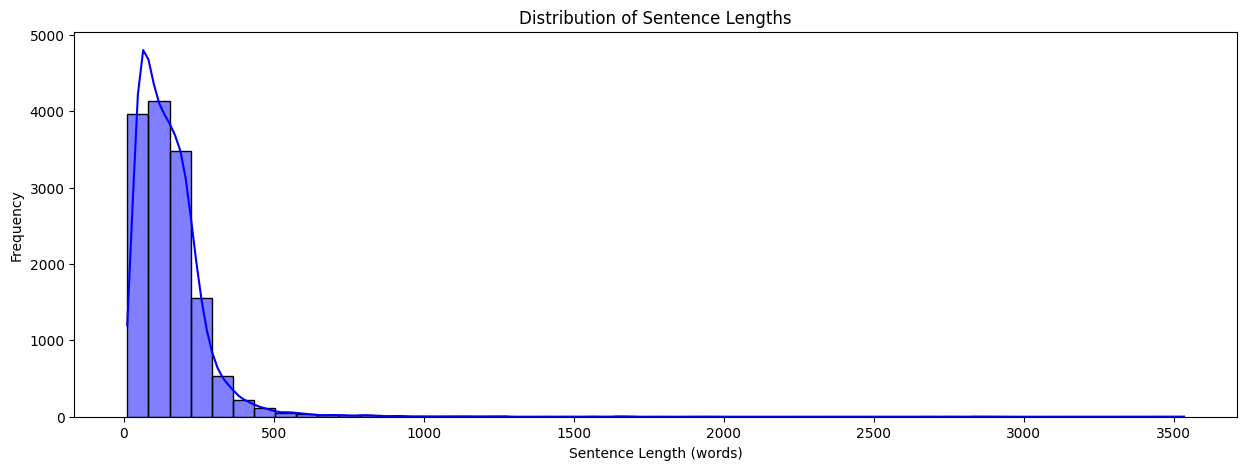

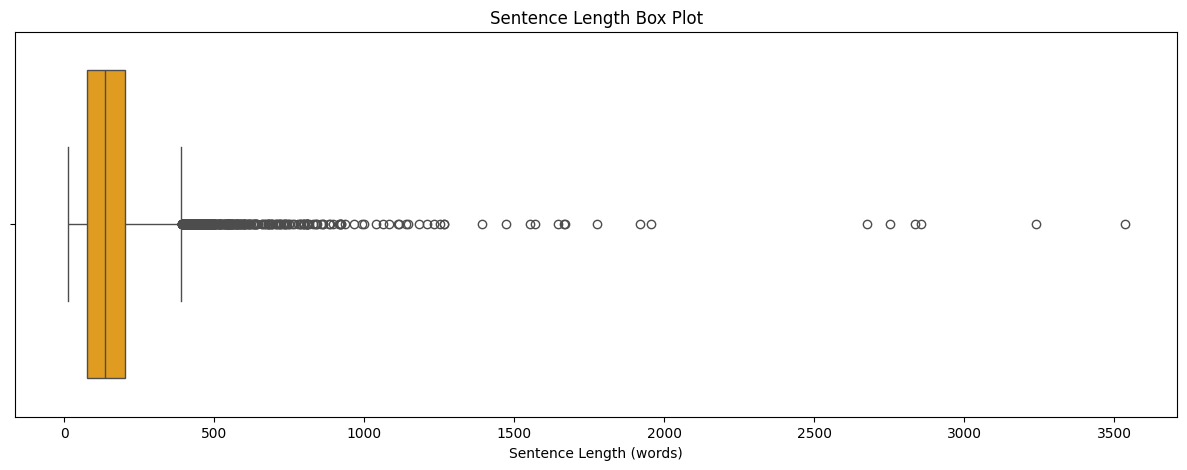

In [33]:
df['sentence_length'] = df['combined_text'].apply(lambda x: len(str(x).split()))  # Word count

# Plot histogram
plt.figure(figsize=(15, 5))
sns.histplot(df['sentence_length'], bins=50, kde=True, color='blue')
plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths")
plt.show()

# Plot box plot
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['sentence_length'], color='orange')
plt.xlabel("Sentence Length (words)")
plt.title("Sentence Length Box Plot")
plt.show()

In [34]:
Q1 = df['sentence_length'].quantile(0.25)
Q3 = df['sentence_length'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['sentence_length'] < lower_bound) | (df['sentence_length'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers: {outlier_count}")

Number of outliers: 423


In [35]:
tokenizer = Tokenizer(oov_token="<UNK>")
tokenizer.fit_on_texts(all_texts)

vocab_size = len(tokenizer.word_index) + 1

encode_data = tokenizer.texts_to_sequences(all_texts)

In [71]:
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}

token_id = 5 # Example token ID
word = reverse_word_index.get(token_id, "UNKNOWN")
print(f"Token {token_id} corresponds to word: {word}")


Token 5 corresponds to word: title


In [37]:
# Reverse mapping: {index: word}
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}

# Get the first 200 token-word pairs
tokens_set = {(index, reverse_word_index[index]) for index in list(reverse_word_index.keys())[:200]}

# Print the set
print(tokens_set)


{(73, 'ุงูุนุงู'), (5, 'title'), (157, 'ุงููุนุฑูู'), (71, 'ุฏุฑุงุณุงุช'), (45, 'ูููู'), (193, 'ุงูุชุงุฑูุฎูู'), (140, 'ูุนูู'), (99, 'ุงููุฌุชูุน'), (104, 'ุงูููู'), (68, 'ุงููุฎุชููู'), (190, 'ุนูู'), (103, 'ุงูุนูู'), (6, 'ุนุงู'), (134, 'ุงููุฑุงู'), (36, 'ุนูู'), (69, 'ูููู'), (187, 'ุงูุดูุฎ'), (176, 'ุญุตู'), (61, 'ุงูุนูู'), (126, 'ุณูุณูู'), (16, 'ุนุจุฏ'), (123, 'ููุถูุน'), (25, 'ููู'), (108, 'ุงุฏุงุฑู'), (90, 'ุงููุงุฑู'), (171, 'ุนูุฏูุง'), (4, 'genres'), (46, 'ููุงู'), (59, 'ุงูุงุณูุงููู'), (80, 'ุงูุงุณูุงูู'), (43, 'ุงููุฑู'), (93, 'ูุตุต'), (41, 'ุญูู'), (22, 'ุฌุงูุนู'), (102, 'ุงูุงุฌุชูุงุนูู'), (83, 'ุนุจุฑ'), (66, 'ุงูุญุฏูุซ'), (34, 'ุงูุนููู'), (23, 'ูุงูุช'), (192, 'ุจุงูุงุถุงูู'), (7, 'ูู'), (89, 'ูุชูุงูู'), (124, 'ุงูุนููู'), (184, 'ุงูุซูุงูู'), (195, 'ุฌุงูุฒู'), (17, 'ุงูุนุงูู'), (24, 'ุงููุบู'), (1, '<UNK>'), (101, 'ุงูุงุณูุงู

In [133]:
# encode_data[150]

In [39]:
# Find the longest sequence length
max_sentence_length = max(len(seq) for seq in encode_data)

# Pad sequences using the dynamically determined maxlen
padded_docs = pad_sequences(encode_data, maxlen=300, padding='post')

print(padded_docs, padded_docs.shape)

[[ 2275   351   331 ...     5 14805 21846]
 [11206    44    80 ...     0     0     0]
 [43945    44    11 ...     0     0     0]
 ...
 [  599   115   145 ...     0     0     0]
 [  154     2   133 ...     0     0     0]
 [ 2393    12   534 ...     0     0     0]] (14200, 300)


In [40]:
print(vocab_size, max_sentence_length)

168033 3531


In [183]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=8),
    Flatten()
])

In [184]:
sample_input = tf.convert_to_tensor(padded_docs, dtype=tf.int32)
embedded_output = model(sample_input)
print(embedded_output.shape)
print(embedded_output)

(14200, 2400)
tf.Tensor(
[[-0.01698326 -0.0156287   0.00286455 ... -0.02589084  0.04701984
   0.00807733]
 [ 0.0391393  -0.00159768 -0.02501495 ... -0.00618624  0.04618964
  -0.02021771]
 [-0.03537618 -0.04853463  0.02281097 ... -0.00618624  0.04618964
  -0.02021771]
 ...
 [ 0.04974845 -0.00406007 -0.04958236 ... -0.00618624  0.04618964
  -0.02021771]
 [ 0.01662738  0.03293612  0.00832073 ... -0.00618624  0.04618964
  -0.02021771]
 [ 0.02736462  0.02798739  0.00147684 ... -0.00618624  0.04618964
  -0.02021771]], shape=(14200, 2400), dtype=float32)


In [194]:
print(embedded_output[0])

tf.Tensor(
[-0.01698326 -0.0156287   0.00286455 ... -0.02589084  0.04701984
  0.00807733], shape=(2400,), dtype=float32)


In [186]:
query_text = ["ุนุจุงุณ ูุญููุฏ ุงูุนูุงุฏ"]
query_sequence = tokenizer.texts_to_sequences(query_text)
print(query_sequence)
# Pad the query to match input shape
query_padded = pad_sequences(query_sequence, maxlen=300, padding='post')

# Convert query to embedding
query_embedding = model(tf.constant(query_padded))
# print(query_embedding)
# # Print query shape
print("Query Embedding Shape:", query_embedding.shape)

[[602, 130, 509]]
Query Embedding Shape: (1, 2400)


#Similarity

In [178]:
cos_similarities = cosine_similarity(embedded_output, query_embedding)

cos_similarities = cos_similarities.flatten()

most_similar_index = np.argmax(cos_similarities)

print(f"Most Similar Index: {most_similar_index}")
print(f"Highest Cosine Similarity Score: {cos_similarities[most_similar_index]}")


Most Similar Index: 8331
Highest Cosine Similarity Score: 0.9830659031867981


In [179]:
top_n = 10
top_n_indices = np.argsort(cos_similarities)[-top_n:][::-1]  # Sort in descending order

# Print the top 10 most similar embeddings
print("Top 10 most similar indices and their cosine similarity scores:")
for rank, idx in enumerate(top_n_indices, start=1):
    print(f"Rank {rank}: Index {idx}, Similarity: {cos_similarities[idx]:.4f}")

Top 10 most similar indices and their cosine similarity scores:
Rank 1: Index 8331, Similarity: 0.9831
Rank 2: Index 1631, Similarity: 0.9778
Rank 3: Index 4464, Similarity: 0.9771
Rank 4: Index 6427, Similarity: 0.9766
Rank 5: Index 5932, Similarity: 0.9761
Rank 6: Index 6425, Similarity: 0.9723
Rank 7: Index 13519, Similarity: 0.9722
Rank 8: Index 2539, Similarity: 0.9720
Rank 9: Index 13753, Similarity: 0.9717
Rank 10: Index 8989, Similarity: 0.9715


In [180]:
all_texts[5932]

'ุฑูุงูู ูุตุฑู | Author:  ูุญูุฏ ุตุงุฏู | Genres: nan | title: ููุจุชูุง|'

In [181]:
from numpy import dot
from numpy.linalg import norm

query_vec = query_embedding[0]  # shape (embedding_dim,)
cosine_scores_np = []
for emb in embedded_output:
    # Cosine similarity = dot(a,b) / (norm(a)*norm(b))
    sim = dot(query_vec, emb) / (norm(query_vec) * norm(emb))
    cosine_scores_np.append(sim)

cosine_scores_np = np.array(cosine_scores_np)  # shape: (num_books,)

In [182]:
# Get the top 5 indices
top_5_indices = np.argsort(-cosine_scores_np)[:1]  # sort descending, take first 5
top_5_indices = top_5_indices.flatten()  # flatten if needed
# Retrieve corresponding rows from the DataFrame
top_5_books = df.iloc[top_5_indices]

# Print or return the results
for i, idx in enumerate(top_5_indices):
    score = cosine_scores_np[idx]
    row = df.iloc[idx]
    print(f"Rank {i+1}")
    print(f"Title: {row.get('Title', 'N/A')}")  # or row["Title"] if the column is "Title"
    print(f"Author: {row.get('Author', 'N/A')}")
    print(f"Genres: {row.get('Genres', 'N/A')}")
    print("---")

Rank 1
Title: ุงูุญุจ ูุงููุทุฑ
Author:  ูุงุฏูุง ูุนุงููู
Genres: nan
---


#Skill issue

In [74]:
# query_embedding_flat = tf.reduce_mean(query_embedding, axis=1)  # Average over words
# data_embeddings_flat = tf.reduce_mean(embedded_output, axis=1)  # Average over words
# print(query_embedding_flat.shape)
# print(data_embeddings_flat.shape)

# # Convert to numpy
# query_embedding_np = query_embedding_flat.numpy()
# data_embeddings_np = data_embeddings_flat.numpy()

# # Compute cosine similarity
# cos_similarities = cosine_similarity(query_embedding, embedded_output)
# cos_similarities = cos_similarities.ravel()  # Now it's (1000,)

# # Print similarity scores
# print("Cosine Similarities:", cos_similarities.shape)


In [104]:
# top_indices = np.argsort(cos_similarities)[::-1][:5]
# print("Top 5 most similar sentences:", top_indices)
# print("Similarities:", cos_similarities[top_indices])

In [105]:
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity

# # Compute cosine similarity
# # cos_similarities = cosine_similarity(query_embedding_np, data_embeddings_np)[0]

# # Get the index of the most similar text
# most_similar_index = np.argmax(cos_similarities)  # Single best match
# most_similar_text = all_texts[most_similar_index]
# print(f"\n๐น **Most Similar Text:** {most_similar_text} - Similarity: {cos_similarities[most_similar_index]}")

# # Get indices of top 10 most similar sentences (sorted in descending order)
# top_10_indices = np.argsort(-cos_similarities)[:10]  # Fix sorting issue
# #
# # Print top 10 most similar texts with their similarity scores
# print("\n๐น **Top 10 Most Similar Sentences:**")
# for i, idx in enumerate(top_10_indices):
#     print(f"{i+1}. {idx} {all_texts[idx]} - Similarity: {cos_similarities[idx]:.4f}")
